In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
hsl = pd.read_csv('./datasets/hsl/2021-05.csv', parse_dates=['Departure', 'Return'], date_format='ISO8601')
hsl = hsl[::-1]
hsl

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.)
407337,2021-05-01 00:00:11,2021-05-01 00:04:34,138,Arabiankatu,138,Arabiankatu,1057.0,259
407336,2021-05-01 00:00:30,2021-05-01 00:09:53,17,Varsapuistikko,45,Brahen kenttä,1688.0,558
407335,2021-05-01 00:00:30,2021-05-01 00:11:55,25,Narinkka,123,Näkinsilta,2088.0,679
407334,2021-05-01 00:00:32,2021-05-01 00:29:03,2,Laivasillankatu,201,Länsisatamankuja,6344.0,1709
407333,2021-05-01 00:00:41,2021-05-01 00:12:19,17,Varsapuistikko,45,Brahen kenttä,1690.0,693
...,...,...,...,...,...,...,...,...
4,2021-05-31 23:56:11,2021-06-01 00:02:02,4,Viiskulma,65,Hernesaarenranta,1400.0,350
3,2021-05-31 23:56:23,2021-06-01 00:29:58,4,Viiskulma,65,Hernesaarenranta,4318.0,2009
2,2021-05-31 23:56:44,2021-06-01 00:03:26,123,Näkinsilta,121,Vilhonvuorenkatu,1025.0,399
1,2021-05-31 23:56:59,2021-06-01 00:07:14,82,Töölöntulli,113,Pasilan asema,1870.0,611


In [3]:
hsl2 = hsl[["Departure", "Covered distance (m)", "Duration (sec.)"]]
hsl2.dtypes

Departure               datetime64[ns]
Covered distance (m)           float64
Duration (sec.)                  int64
dtype: object

In [4]:
hsl2 = hsl2.set_index("Departure")

hsl2.dropna(axis=0, inplace=True)
print("NA removed:", len(hsl)-len(hsl2))

# https://stackoverflow.com/a/23202269
outliers = (np.abs(stats.zscore(hsl2, axis=0)) >= 3).any(axis=1)
hsl2 = hsl2[~outliers]
print("outliers removed:", sum(outliers))

NA removed: 0
outliers removed: 818


In [5]:
hsl_resampled = hsl2.resample("5min")\
                    .agg({ "Covered distance (m)": ['count', 'mean'],
                           "Duration (sec.)": ['mean']})
hsl_resampled

Covered distance (m)              Duration (sec.)
                                   count         mean            mean
Departure                                                            
2021-05-01 00:00:00                   39  2767.905897      779.923077
2021-05-01 00:05:00                   38  2880.105263      856.289474
2021-05-01 00:10:00                   45  2128.911111      752.577778
2021-05-01 00:15:00                   44  2367.681818     1194.954545
2021-05-01 00:20:00                   32  2706.062500      815.968750
...                                  ...          ...             ...
2021-05-31 23:35:00                    7  1894.285714      527.142857
2021-05-31 23:40:00                    7  1696.285714      574.285714
2021-05-31 23:45:00                   12  1973.916667      817.166667
2021-05-31 23:50:00                    7  2712.142857      913.142857
2021-05-31 23:55:00                    5  2131.200000      773.800000

[8928 rows x 3 columns]

In [6]:
hsl_resampled.columns = ["Started journeys", "Avg. covered distance (m)", "Avg. duration (sec.)"]
hsl_resampled

,Started journeys,Avg. covered distance (m),Avg. duration (sec.)
Departure,,,
2021-05-01 00:00:00,39,2767.905897,779.923077
2021-05-01 00:05:00,38,2880.105263,856.289474
2021-05-01 00:10:00,45,2128.911111,752.577778
2021-05-01 00:15:00,44,2367.681818,1194.954545
2021-05-01 00:20:00,32,2706.062500,815.968750
...,...,...,...
2021-05-31 23:35:00,7,1894.285714,527.142857
2021-05-31 23:40:00,7,1696.285714,574.285714
2021-05-31 23:45:00,12,1973.916667,817.166667


In [7]:
hsl_resampled2 = hsl_resampled.dropna(axis=0)
print("NA dropped:", len(hsl_resampled)-len(hsl_resampled2))

NA dropped: 200


array([<AxesSubplot:xlabel='Departure'>, <AxesSubplot:xlabel='Departure'>,
       <AxesSubplot:xlabel='Departure'>], dtype=object)

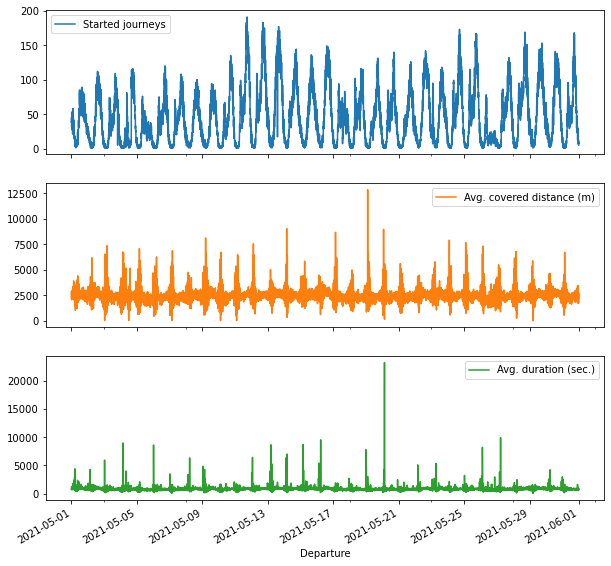

In [8]:
hsl_resampled2.plot(subplots=True, figsize=(10,10))

In [9]:
hsl_resampled2.to_csv('./datasets/preprocessed/hsl_2021_05_5min.csv', index=False)

In [10]:
hsl_resampled2.reset_index(drop=True)

,Started journeys,Avg. covered distance (m),Avg. duration (sec.)
0,39,2767.905897,779.923077
1,38,2880.105263,856.289474
2,45,2128.911111,752.577778
3,44,2367.681818,1194.954545
4,32,2706.062500,815.968750
...,...,...,...
8723,7,1894.285714,527.142857
8724,7,1696.285714,574.285714
8725,12,1973.916667,817.166667
8726,7,2712.142857,913.142857


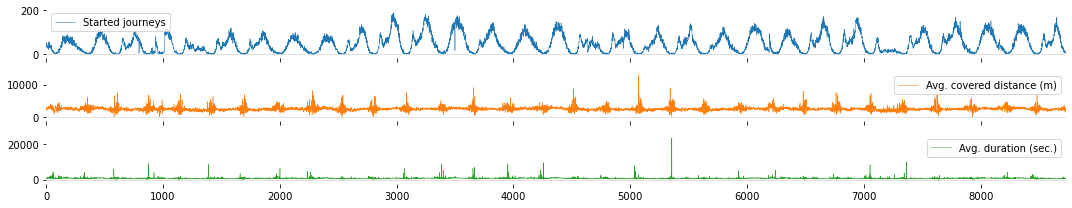

In [11]:
fig, axs = plt.subplots(3, figsize=(15,3))
hsl_resampled2.reset_index(drop=True).plot(subplots=True, ax=axs, linewidth=0.5)
for ax in axs:
    ax.margins(x=0,y=0.1)
    ax.axhline(c='grey', alpha=0.5, linewidth=0.5)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.spines.values(), visible=False)
    
axs[-1].xaxis.tick_bottom()
plt.tight_layout()
plt.savefig("datasets/plots/hsl.png", dpi=300)


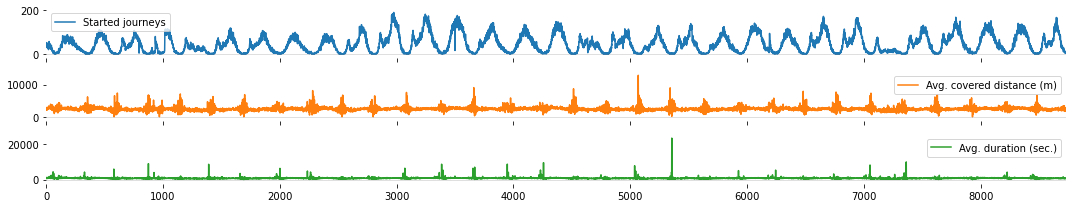

In [12]:
from datasets.plots import plot_datasets2
plot_datasets2(hsl_resampled2)
plt.savefig(f"datasets/plots/hsl.png", dpi=300)